# Linear Regression
*The lab is borrowed from Andrew Ng's ML course.*

In this exercise, you will implement linear regression and get to see it work on data.

# Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as opt

In [ ]:
# Part 2 
# Linear Regression with on variable
dataset_2 = pd.read_csv(r"D:\UCAS\UCAS2023\Machine Learning\lab02\lab02\ex1data1.txt",header=None) 
dataset_2.columns=['input_x','target_y']
dataset_2

,input_x,target_y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


# Plotting the Data
Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population. 
(Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.)

C:\Users\pc\.ipython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'population of city in 10,000s')

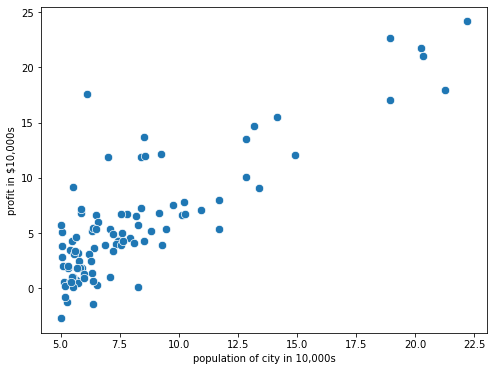

In [ ]:
# Plot Data
# Plot Data
plt.figure(figsize=(8,6))
sns.scatterplot(dataset_2['input_x'],dataset_2['target_y'], s= 70)
plt.ylabel('profit in $10,000s')
plt.xlabel('population of city in 10,000s')

# Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

## Update Equations
The objective of linear regression is to minimize the cost function
$J(\theta)=\frac{1}{m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)}\ -\ y^{(i)}\right)^2\right)$
where the hypothesis $h_\theta(x)$ is given by the linear model
$h_\theta(x) = θ^T x = \theta_0 +\theta_1 x_1$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost J($\theta$). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$\theta_j:= \theta_j - α \frac{1}{m} \sum_{i=1}^{m}\left(h_\theta(x^{(i)}\ -\ y^{(i)}\right) x_j^{(i)}) $

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

In [ ]:
def costFunction (ini_weights,inputs, target,learning_rate, iter):
    length=len(target)
    lossList=[]
    wlist=[]
    for itr in range(iter):
        error =1/length* np.dot(inputs.T,((inputs.dot(ini_weights)) -target))
        ini_weights=ini_weights-(learning_rate*error)
        weights=ini_weights
        yPredict=inputs.dot(weights)
        squareError=(yPredict- target)**2
        loss=1/(2*length)*np.sum(squareError)
        lossList.append(loss)
        wlist.append(weights)
    return lossList,weights,wlist

In the following lines, we need to add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [ ]:
# Adding Bias to the inpt Dataset If not already added 
if 'Bias' not in dataset_2.columns :
    dataset_2['Bias'] = 1

As you perform gradient descent to learn minimize the cost function J($\theta$), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J($\theta$) so you can check the convergence of your gradient descent implementation.
Next, you will implement gradient descent using loop for 100 iterations, and you need to supply the updates to $\theta$ within each iteration.

After finding the best $\theta$ using Gradient descient, `plot the best fitting Line ` for that $\theta$ with respect to the dataset.

**Parameters that I used:**

use Initial weights of [0.1, 0.1],

train for 1500 iterations, 

learning rate = 0.01 



New weight =: [-3.62434423  1.16576489]


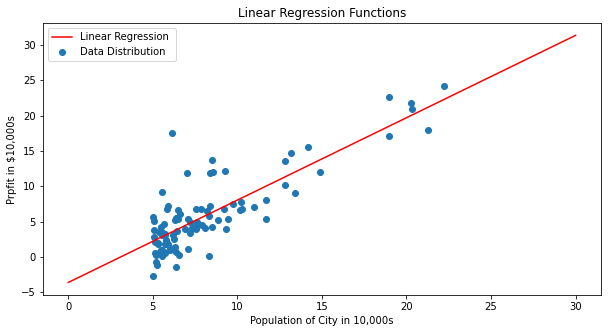

In [ ]:
initial_weights = [0.1,0.1]
lossList,weights,wlist = costFunction(initial_weights , dataset_2[['Bias','input_x']],dataset_2['target_y'],0.01,1500)
x1_val = np.linspace(0,30,100)
input_d = np.array([np.ones(len(x1_val)), x1_val])
trained_w = weights
print('\n\nNew weight =: {}'.format(trained_w))
plt.figure(figsize = (10,5))
plt.scatter(dataset_2["input_x"] , dataset_2['target_y'])
y_val = trained_w @ input_d
plt.plot(x1_val,y_val,color='red')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Prpfit in $10,000s')
plt.title('Linear Regression Functions')
plt.legend(['Linear Regression ', 'Data Distribution'])
plt.show()
# Write your Code Here 

**Plot Learning Loss**

Plot error value vs iterations.

From the previous code, you need to find the error for each iteration and after that plot Loss vs interations.

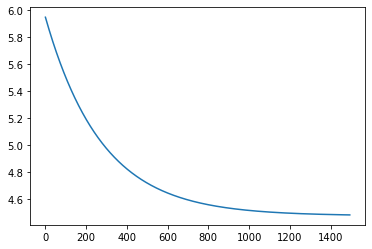

In [ ]:
lossList,weights,wlist = costFunction(initial_weights , dataset_2[['Bias','input_x']],dataset_2['target_y'],0.01,1500)
losses = np.array(lossList[5:])
plt.plot(losses) 

**Visualizing J($\theta$)**

To understand the cost function J($\theta$) better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

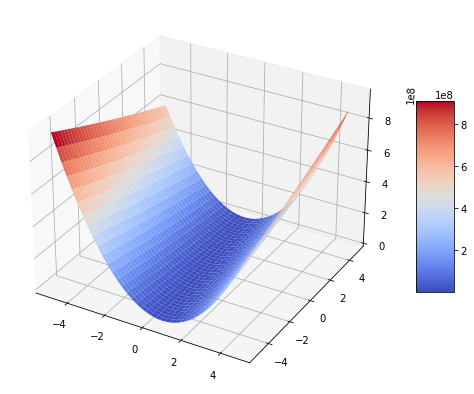

In [ ]:
# Plot 3D cost Function 

# Write your Code Here 
from matplotlib.ticker import LinearLocator
from matplotlib.pyplot import cm
m = dataset_2.input_x.shape[0]

W0 = np.arange(-5,5,0.25)
W1 = np.arange(-5,5,0.25)
x,y = np.meshgrid(W0,W1)
Y_Pred = np.array([W0,W1])
Z_m = []
for w0 in W0 :
    Z = []
    for w1 in W1 :
        error = ((1/2*m) * np.sum(dataset_2[['Bias','input_x']] @ np.array([w0,w1]).T)**2)
        Z.append(error)
    Z_m.append(Z)
Z_m = np.matrix(Z_m)
fig , ax = plt.subplots(subplot_kw={'projection':'3d'},figsize = (10,7))
plot = ax.plot_surface(x,y,Z_m,cmap=cm.coolwarm)
fig.colorbar(plot,shrink=0.5,aspect=5)
plt.show()

# Linear Regression with Multiple Variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [ ]:
# Write a code to read the dataset 
# Write your Code Here 
# Part 2 
# Linear Regression with on variable
data_2 = pd.read_csv(r"D:\UCAS\UCAS2023\Machine Learning\lab02\lab02\ex1data2.txt",header=None) 
data_2.columns=['Size','Bedroom','Price']
data_features = data_2[['Size','Bedroom']]
data_target = data_2['Price']
data_2.head(5)

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# Feature Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
*   Subtract the mean value of each feature from the dataset.
*   After subtracting the mean, additionally scale (divide) the feature values by their respective \standard deviations."




In [ ]:
# Features Normalization

# Write a function that return the normalized data for a given vector the Normalize_Data calculate normalization using mean & stander diviation
# After that find the normalized data for size and Bedrooms columns 
def Normalize_Data (Column):
    return (Column - Column.mean())/(Column.std())
# Write your Code Here 
data_features.Size = Normalize_Data(data_features.Size)
data_features.Bedroom = Normalize_Data(data_features.Bedroom)

C:\Users\pc\.ipython\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Add Bias to the dataset 

In [ ]:

# Adding Bias Column 
# Write your Code Here 
if "bias" not in data_features:
    data_features['bias'] = 1

# Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

## Implemet Cost Function for multivariant features 

you need to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Cost Funtion:
$J(\theta) = \frac{1}{2m} (X \theta - Y)^{T} (X \theta - Y)$


In [ ]:
def computeCostMulti(Inputs,Outputs,Weights):
    #Cost function
    # Write your Code Here 
    m = Inputs.shape[0]
    inputs = Inputs
    weights = np.array(Weights).reshape(-1,1)
    outputs = np.array(Outputs).reshape(-1,1)
    h = inputs @ weights
    error = h - outputs
    J = (1 / (2*m)) * np.sum(error.T @ error )
    return J  # J here the cost value 
print(computeCostMulti(data_features,data_target,[0,0,0]))

0    6.559155e+10
dtype: float64


**Data Plot in 3D**

Plot the dataset in 3D, `Hint` use matplotlib with scatter3D




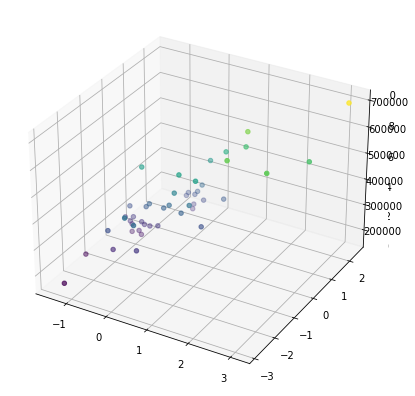

In [ ]:
 # Write your Code Here
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
zdata=data_target
xdata=data_features['Size']
ydata=data_features['Bedroom']
ax.scatter3D(xdata,ydata,zdata,c=zdata)

# Implement Gradient descent

Implement Gradient Decent function that take the below inputs:
*   Input Features
*   Outputs
*   Initial weights (theta)
*   Learning rate "Alpha"
*   number of iterations

and the ouputs of that function are:
*   weights
*   Loss "Error"




In [ ]:
def gradientDescentMulti(Inputs, Targets, ini_weight, alpha, num_iters):
 # Write your Code Here
    Inputs = Inputs.T
    weight = ini_weight.T
    m = Inputs.shape[1]
    J_total = []
    for iteration in range(num_iters):
        Y_pred = np.matrix(weight @ Inputs)
        update_w =(Y_pred.T - Targets).T @ Inputs.T
        weight = weight - (alpha * (1/m) * update_w.T).T
        J = computeCostMulti(Inputs.T, Targets,weight)
        J_total.append(J)
    return weight
Opt_weight = gradientDescentMulti(data_features[['Size','Bedroom','bias']],pd.DataFrame(data_target),np.array([0,0,0]),0.05,100)
Opt_weight

,Size,Bedroom,bias
Price,103963.016263,-18.44228,338397.236476


<Figure size 432x288 with 0 Axes>

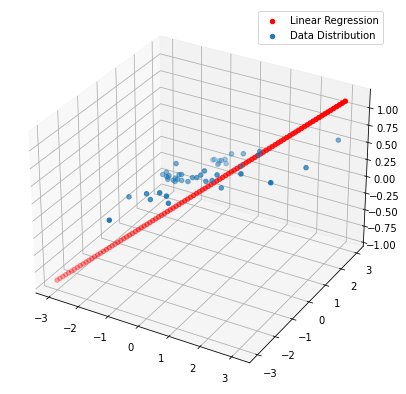

In [ ]:
# Plot Data distribution & the Regression Function 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 # Write your Code Here
fig = plt.figure()
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
xyline = np.linspace(-3,3,100)
zline = []
for ii in xyline :
    zz = Opt_weight.iloc[0,0]*1 + Opt_weight.iloc[0,1]* ii + Opt_weight.iloc[0,2]*ii
    zline.append(zz)

ax.scatter3D(xyline,xyline,zline,color='Red')
zdata=data_target
xdata=data_features['Size']
ydata=data_features['Bedroom']
ax.scatter3D(xdata,ydata,zdata,cmap='blues')
plt.legend(['Linear Regression','Data Distribution'])
 # Write your Code Here 

# Ex. 5
# Regularized Linear Regression and Bias v.s. Variance


In this exercise, you will implement regularized linear regression and use it to study models with di
erent bias-variance properties.
In the first half of the exercise, you will implement regularized linear regression to predict the amount of water  owing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

You need to read dataset from `ex5data1.mat`. This dataset is divided into three parts:
1.   A training set that your model will learn on: X, y
2.   A cross validation set for determining the regularization parameter:
Xval, yval
3.   A test set for evaluating performance. These are \unseen" examples
which your model did not see during training: Xtest, ytest

In the following parts, you will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, you will implement polynomial regression to find a better fit to the data.

In [ ]:
import scipy.io
from scipy.optimize import minimize
import pandas as pd
# Load Data
mat = scipy.io.loadmat(r"C:\Users\pc\Downloads\Telegram Desktop\ex5data1.mat")
data_ex5 = pd.DataFrame(np.hstack((mat['X'], mat['y'])), columns=['ex5_x','ex5_y'])
data_ex5_val = pd.DataFrame(np.hstack((mat['Xval'], mat['yval'] )), columns=['ex5_x','ex5_y'])
data_ex5_test =pd.DataFrame(np.hstack(( mat['Xtest'], mat['ytest'] )), columns=['ex5_x','ex5_y'])
data_ex5_test

,ex5_x,ex5_y
0,-33.318004,3.316890
1,-37.912164,5.397690
2,-51.206938,0.130430
3,-6.132596,6.192598
4,21.261183,17.088487
5,-40.319529,0.799508
6,-14.541532,2.824792
7,32.559760,28.621233
8,13.393433,17.046391
9,44.209886,55.384373


# Visualizing the dataset
We will begin by visualizing the dataset containing historical records on the change in the water level, x, and the amount of water flowing out of the dam, y.

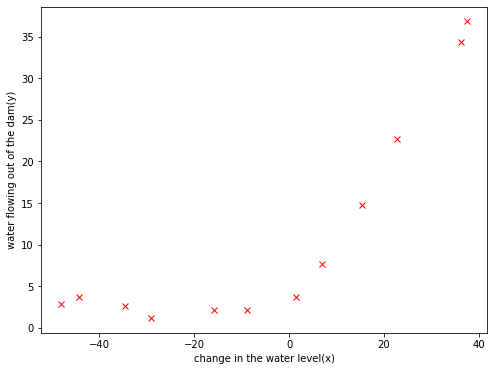

In [ ]:
 # Write your Code Here 
plt.figure(figsize=(8,6))
plt.xlabel('change in the water level(x)')
plt.ylabel('water flowing out of the dam(y)')
plt.plot(data_ex5.ex5_x,data_ex5.ex5_y,'rx')

**Add Bias to Dataset**

In [ ]:
 # Add Bias to the dataset
 # Write your Code Here 
data = data_ex5
if "bias" not in data_ex5:
    data['bias'] = 1
data

,ex5_x,ex5_y,bias
0,-15.936758,2.134311,1
1,-29.152979,1.173257,1
2,36.189549,34.359109,1
3,37.492187,36.837955,1
4,-48.058829,2.808965,1
5,-8.941458,2.121072,1
6,15.307793,14.710268,1
7,-34.706266,2.614184,1
8,1.389154,3.740172,1
9,-44.383760,3.731691,1


Recall that regularized linear regression has the following cost function:
$J(\theta)=\frac{1}{2m}\left(\sum_{i=1}^{m}\left(h_\theta(x^{(i)})\ -\ y^{(i)}\right)^2\right) + \frac{λ}{2m}(\sum_{j=1}^n{\theta_j^2})$
where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting).
The regularization term puts a penalty on the overal cost J.
the gradient of that function is:


*   $\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m {(h_\theta(x^{(i)})\ -\ y^{(i)})x_j^{(i)})}$        $\qquad for \quad j=0$

*   $\frac{\partial J(\theta)}{\partial \theta_0} = (\frac{1}{m}\sum_{i=1}^m {(h_\theta(x^{(i)})\ -\ y^{(i)})x_j^{(i)})) + \frac {\lambda}{m} \theta_j}$ $\qquad for \quad j\ \ge 0$
$ \ $


The function you need to build is 
linearRegCostFunction(Input_x, Target_y, Weight_w , LAMBDA)
and it returns the cost and gradient.
When you are finished, run your gradient function using theta initialized at [1; 1].

You should expect to see a gradient of [-15.30; 598.250].

In [ ]:
# # Write your Code Here
def linearRegCostFunction(Input_x, Target_y, Weight_w , LAMBDA):
    m = Input_x.shape[0]
    Input_x = np.matrix(Input_x)
    Weight_w = np.matrix(Weight_w)
    Target_y = np.matrix(Target_y)
    error = (Input_x @ Weight_w)- (Target_y).T
    SSE = np.sum(error.T @ error)
    unRegTerm_plot = (1 /(2 * m))* SSE
    regTerm_plot = (LAMBDA / (2 * m) * SSE)
    Grad = (1/m) * (Input_x.T @ error) + ((LAMBDA /(2* m))* np.sum(Weight_w.T @ Weight_w ))
    J = unRegTerm_plot + regTerm_plot           
    return J,Grad
theta = np.array([[1], [1]])
(_,grad)= linearRegCostFunction(data[['bias','ex5_x']], data_ex5.ex5_y, theta, 20)
grad

matrix([[-13.63634901],
        [599.83407751]])

# Optimize weights using optimization algorithm

Once your cost function and gradient are working correctly, the next part you will build function `trainLinearReg(Input_x, Target_y, LAMBDA)` to calculate the optimal value for theta using any library that you want to minimize the error (Suggestion: you can use **`minimize`** function from **`scipy.optimize`** library.

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization.

In [ ]:
from scipy.optimize import minimize

def trainLinearReg(X, y, lambda_coef):

    initial_theta = np.matrix([1,1,1]).T 
    
    # Create "short hand" for the cost function to be minimized.
    def costFunction(theta):
        return linearRegCostFunction(X, y, theta, lambda_coef)
    
    # Now, costFunction is a function that takes in only one argument.
    results = minimize(fun=costFunction,
                       x0=initial_theta,
                       method='CG',
                       jac=True,
                       options={'maxiter':200})
    theta = results.x

    return theta

# Train linear regression with lambda_coef = 0.
theta = trainLinearReg(data_ex5.ex5_x, y, 0)
theta

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 12)

In [ ]:
from scipy.optimize import minimize
def cost(W,X_train,Y_train,X_val,Y_val,Lambda):
    m = X_train.shape[0]
    """h_train = X_train.T @ W
    h_val = X_val.T @ W
    J_train = (1/(2*m)) * ((h_train - Y_train).T @ (h_train - Y_train)) + (Lambda/(2*m) * (W.T @W))
    J_val = (1/(2*m)) * ((h_val - Y_val).T @ (h_val - Y_val)) + (Lambda/(2*m) * (W.T @W))
    Grad = X_train @ (X_train.T @ W - Y_val)"""
    return (X_train.shape)
w0 = np.matrix([1,1,1]).T
def trainLinearReg(Input_x, Target_y, LAMBDA):
    opt = scipy.optimize.minimize(fun=cost(w0,data_ex5_val.ex5_x,data_ex5_val.ex5_y,data_ex5_test.ex5_x,data_ex5_test.ex5_y,0),
                           x0=w0,
                           args=(Input_x, Target_y, LAMBDA),
                           method='Powell',
                           jac=False,options={'maxiter':200})
    return theta

theta = trainLinearReg(data_ex5_val , data_ex5_test , 0)
theta

TypeError: 'tuple' object is not callable

**Plot the fitting line for the optimizaed value of theta**

Use the output "theta" from the previous part and plot the fitting line corresponsing to that theta with respect to the data.

NameError: name 'X' is not defined

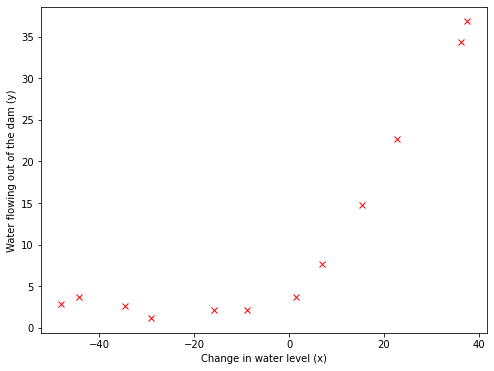

In [ ]:
 # Write your Code Here 
plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(data_ex5.ex5_x,data_ex5.ex5_y,'rx')
plt.plot(X, np.dot(data[['bias','ex5_x']], theta), '--')

# Bias-variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance over
t to the training data.

In this part of the exercise, you will plot training and test errors on a
learning curve to diagnose bias-variance problems.

To plot the learning curve, we need a training and cross validation set
error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set X.
You can use the trainLinearReg function to find the $\theta$ parameters. Note that the lambda is passed as a parameter to the learningCurve function. After learning the $\theta$ parameters, you should compute the error on the training and cross validation sets.

In [ ]:
# Create a function that generates the errors.
def learningCurve(X, y, Xval, yval, lambda_coef):
    m = len(X)
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    for i in range(1, m+1):
        theta = trainLinearReg(X[:i], y[:i], lambda_coef)
        error_train[i-1] = linearRegCostFunction(X[:i], y[:i], theta, 0)[0]
        error_val[i-1] = linearRegCostFunction(Xval, yval, theta, 0)[0]        
 # Write your Code Here 
    return error_train, error_val

In [ ]:
m = len(data_ex5)

# Add Bias to Validation Data

error_train, error_val = learningCurve(data_ex5_test.ex5_x,data_ex5_test.ex5_y,data_ex5_val.ex5_x, data_ex5_val.ex5_y, 0)
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('{}\t\t\t{:f}\t{:f}\n'.format(i+1, float(error_train[i]), float(error_val[i])))
 # Write your Code Here 
plt.figure(figsize=(8, 6))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 3: Linear regression learning curve')
plt.plot(range(1,m+1), error_train, 'b', label='Train')
plt.plot(range(1,m+1), error_val, 'g', label='Cross Validation')
plt.legend()

TypeError: cost() missing 2 required positional arguments: 'Y_val' and 'Lambda'

# Polynomial regression

The problem with our linear model was that it was too simple for the data
and resulted in under
tting (high bias). In this part of the exercise, you will address this problem by adding more features.
For use polynomial regression, our hypothesis has the form:

$h_\theta(x) = \theta_0 + \theta_1 (WaterLevel) +\theta_2 (WaterLevel)^2 + ... + \theta_p (WaterLevel)^p $

Now, you will add more features using the higher powers of the existing
feature x in the dataset.
you need to implement a function `polyFeatures(X, p)` that take the input "X" with size (m x 1) feature and the polynomial order "p", the function should return a X_poly matrix of size (m x P).

In [ ]:
def polyFeatures(X, p):
 # Write your Code Here 
    X_poly = X
    for i in range(1, p):
        X_poly = np.column_stack((X_poly, np.power(X, i+1)))
    return X_poly


# Normalize polynomial features 

Now you need to build a function to normalize the polynomial feature matrix that takes the X_poly matrix as input and return the normalized X_poly matrix , $\mu$ and $\sigma$. 

After building the function, generate X_poly matrix with $P= 8$ for input dataset, Test dataset and validation dataset, then normalize these matricies.

In [ ]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma
p = 8
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly) # Normalize
X_poly = np.insert(X_poly, 0, 1, axis=1)
X_poly_test = polyFeatures(data_ex5_test.ex5_x, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.insert(X_poly_test, 0, 1, axis=1) 
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.insert(X_poly_val, 0, 1, axis=1) # Add Ones

print('Normalized Training Example 1:')
print(X_poly[1, :])

ValueError: operands could not be broadcast together with shapes (21,16) (8,) 

In [ ]:

# Create a function to plot a polynomial regression fit.
def plotFit(min_x, max_x, mu, sigma, theta, p):
    x = np.array(np.arange(min_x - 15, max_x + 25, 0.05))

    X_poly = polyFeatures(x, p)
    X_poly = X_poly - mu
    X_poly = X_poly / sigma

    X_poly = np.insert(X_poly, 0, 1, axis=1)

    plt.plot(x, np.dot(X_poly, theta), '--')


theta = trainLinearReg(X_poly, y, 0)

plt.figure(figsize=(8, 6))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Figure 4: Polynomial fit, $\lambda$ = 0')
plt.plot(X, y, 'rx')
plotFit(min(X), max(X), mu, sigma, theta, p)

# error_train, error_val = learningCurve(X_poly, y,X_poly_val, yval, 0)

plt.figure(figsize=(8, 6))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Figure 5: Polynomial learning curve, $\lambda$ = 0')
plt.plot(range(1,m+1), error_train, 'b', label='Train')
plt.plot(range(1,m+1), error_val, 'g', label='Cross Validation')
plt.legend()
 # Write your Code Here 


**Plot polynomial feature with learned weights:**

Now you need to train the model using the polynomial feature matrix using $\lambda =0$ to find the weights $\theta$, after finding weights need to plot the weights with respect to input data.
you need also to plot the trainig loss and the validation loss with respect to number of trainig examples in another plot. 

# Adjusting the regularization parameter

In this section, you will get to observe how the regularization parameter
affects the bias-variance of regularized polynomial regression. You should
now modify the the lambda parameter previous section and try $\lambda = 1, 100$ . For each of these values, the script should generate a polynomial fit to the data and also a learning curve.

NameError: name 'X' is not defined

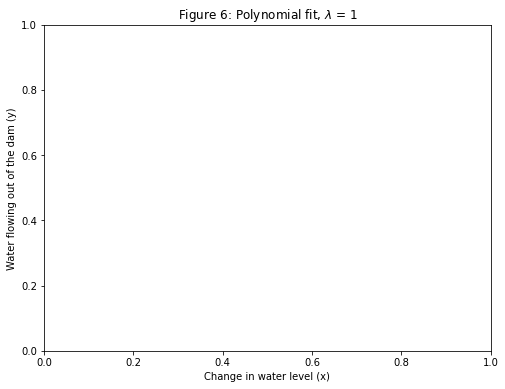

In [ ]:
# p = 8

# # Train linear regression with lambda_coef = 1.
theta = trainLinearReg(X_poly, np.matrix(data_ex5 ['ex5_y']).T, 1)
 # Write your Code Here 


# Train linear regression with lambda_coef = 100.
theta = trainLinearReg(X_poly, np.matrix(data_ex5 ['ex5_y']).T, 100)

 # Write your Code Here 

# Get the errors with lambda_coef set to 100.
error_train, error_val = learningCurve(X_poly, np.matrix(data_ex5 ['ex5_y']).T,
                                       X_poly_val, np.matrix(data_ex5_val ['ex5_y']).T, 100)
 # Write your Code Here 

# Selecting $\lambda$ using a cross validation set

From the previous parts of the exercise, you observed that the value of $\lambda$  can significantly a
ect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda$  = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda$= 100) does not fit the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda$ = 1) can provide a good fit to the data.

In this section, you will implement an automated method to select the
$\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to use the trainLinearReg function to train the model using
different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: {0; 0:001; 0:003; 0:01; 0:03; 0:1; 0:3; 1; 3; 10}.

lambda: 0.0	Train Error: [0.02925807],	Val_error: [59.22083613]
lambda: 0.001	Train Error: [0.21461921],	Val_error: [28.8739107]
lambda: 0.003	Train Error: [0.21713215],	Val_error: [26.36515154]
lambda: 0.01	Train Error: [0.23385417],	Val_error: [20.61007905]
lambda: 0.03	Train Error: [0.27952267],	Val_error: [11.66001869]
lambda: 0.1	Train Error: [0.43601547],	Val_error: [7.95633749]
lambda: 0.3	Train Error: [0.89289888],	Val_error: [4.70361048]
lambda: 1.0	Train Error: [1.96091077],	Val_error: [4.25866728]
lambda: 3.0	Train Error: [4.47691149],	Val_error: [3.81153369]
lambda: 10.0	Train Error: [14.81777648],	Val_error: [8.84710696]
lambda	Train Error	Validation Error

0.0	[0.02925807]	[59.22083613]

0.001	[0.21461921]	[28.8739107]

0.003	[0.21713215]	[26.36515154]

0.01	[0.23385417]	[20.61007905]

0.03	[0.27952267]	[11.66001869]

0.1	[0.43601547]	[7.95633749]

0.3	[0.89289888]	[4.70361048]

1.0	[1.96091077]	[4.25866728]

3.0	[4.47691149]	[3.81153369]

10.0	[14.81777648]	[8.84710696]


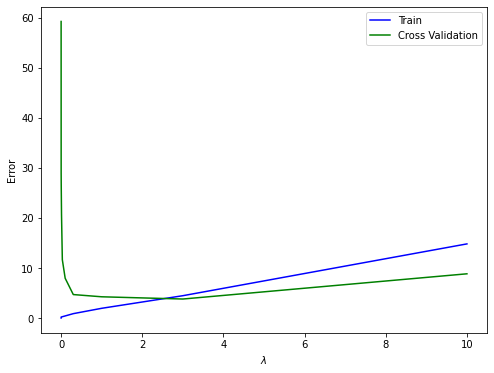

In [ ]:
# Create a function to train the model with various values of lambda_coef.
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1)) 
    for i in range(len(lambda_vec)):
        lambda_coef = lambda_vec[i]
        theta = trainLinearReg(X, y, lambda_coef)

        
        error_train[i] = linearRegCostFunction(X, y, theta, 0)[0]
        error_val[i] = linearRegCostFunction(Xval, yval, theta, 0)[0]
    return lambda_vec, error_train, error_val

lambda_vec, error_train, error_val = validationCurve(X_poly, data_ex5['ex5_y'], X_poly_val, data_ex5_val['ex5_y'])

 # Write your Code Here to plot

